In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:/Chandrashekar S/New Volume/Machine learning/Kaggle Competion/titanic/test.csv',index_col=['PassengerId'])
df.head()

#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 800)
pd.set_option('display.width', 1000)
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 27.8+ KB


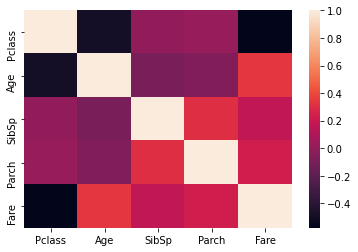

In [2]:
df.info()
sns.heatmap(df.corr())

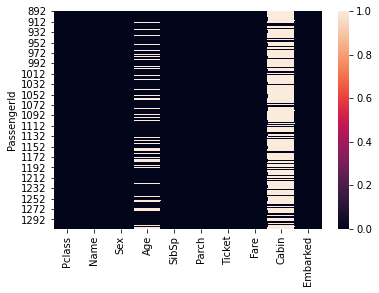

In [3]:
sns.heatmap(df.isna())

In [4]:
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

df["Age_tf"] = df["Age"]
df.head(2)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_tf
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0


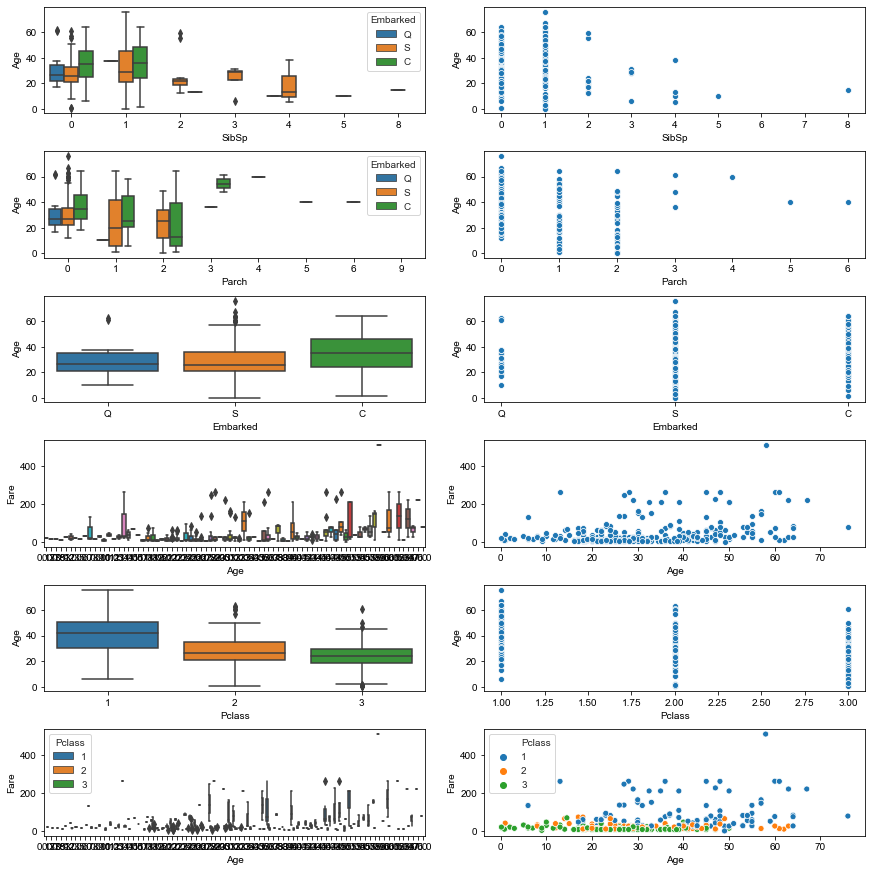

In [5]:
#filt = df.Pclass == 3
#df_pc1 = df.loc[filt,["Age","SibSp"]]
#sns.set_color_codes("dark")
fig, axs = plt.subplots(nrows=6,ncols=2,constrained_layout=True,figsize=(12,12))
sns.set_style(style='whitegrid')
#sns.scatterplot("Age",'SibSp', hue="Embarked",data=df, ax=axs[0])
#sns.scatterplot("Age",'Parch', hue="Embarked",data=df, ax=axs[1])
sns.boxplot('SibSp',"Age",hue='Embarked',data=df,palette='tab10',ax=axs[0,0])
sns.scatterplot('SibSp',"Age",data=df,palette='tab10',ax=axs[0,1])


sns.boxplot('Parch',"Age",hue='Embarked',data=df,palette='tab10',ax=axs[1,0])
sns.scatterplot('Parch',"Age",data=df,palette='tab10',ax=axs[1,1])

sns.boxplot('Embarked',"Age",data=df,palette='tab10',ax=axs[2,0])
sns.scatterplot('Embarked',"Age",data=df,palette='tab10',ax=axs[2,1])

sns.boxplot("Age",'Fare',data=df,palette='tab10',ax=axs[3,0])
sns.scatterplot("Age",'Fare',data=df,palette='tab10',ax=axs[3,1])

sns.boxplot('Pclass',"Age",data=df,palette='tab10',ax=axs[4,0])
sns.scatterplot('Pclass',"Age",data=df,palette='tab10',ax=axs[4,1])

sns.boxplot("Age",'Fare',hue='Pclass',data=df,palette='tab10',ax=axs[5,0])
sns.scatterplot("Age",'Fare',hue='Pclass',data=df,palette='tab10',ax=axs[5,1])

#plt.legend(loc='upper left')
#sns.scatterplot("Age",'Embarked',data=df,palette=Noneax=axs[3])
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.xticks([5,10,15,20,25,30,35,40,45,50,55,60,65])

#g = sns.FacetGrid(data=df, col="Age", hue="Survived")
#g.map(plt.scatter, "Age", "SibSp", alpha=.7)
#g.add_legend();

In [6]:
filt = df.Age_tf.isna() ==True
df_age_null = df.loc[filt,:]
df_age_null

df_age_null.SibSp.value_counts(),df_age_null.Parch.value_counts()

(0    69
 1    13
 2     3
 8     1
 Name: SibSp, dtype: int64,
 0    77
 2     4
 9     2
 1     2
 4     1
 Name: Parch, dtype: int64)

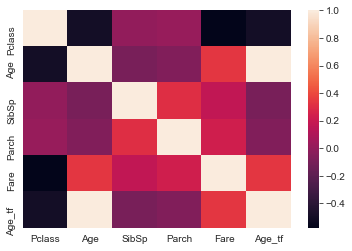

In [7]:
sns.heatmap(df.corr())

In [8]:
def age_tf(sipsp,parch,embarked,age):
    for x in df.index:
        if(np.isnan(df.Age_tf[x]) ):
            if((df.SibSp[x] == sipsp) & (df.Parch[x] == parch) & (df.Embarked[x] == embarked) ):
                df.Age_tf[x] = age
                #print(x)
                pass
            pass
        pass
    pass

age_tf(0,0,'S',29)
age_tf(0,0,'C',30)
age_tf(0,0,'Q',28)
age_tf(0,1,'S',26)
age_tf(0,1,'C',30)
age_tf(0,1,'Q',18)
age_tf(0,2,'S',20)
age_tf(0,2,'C',26)
       
age_tf(1,0,'S',29)
age_tf(1,0,'C',29)
age_tf(1,0,'Q',31)   
age_tf(1,1,'S',26)
age_tf(1,1,'C',30)
age_tf(1,1,'Q',21)
age_tf(1,2,'S',21)
age_tf(1,2,'C',25)

age_tf(2,0,'S',24)
age_tf(2,0,'C',16)
age_tf(2,0,'Q',35)   

age_tf(2,1,'S',23)
age_tf(2,1,'C',18)
age_tf(2,1,'Q',36)   

age_tf(3,0,'S',20)
age_tf(3,1,'S',16)
age_tf(3,2,'S',10)   

       


<ipython-input-8-80056572ac18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age_tf[x] = age


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
 10  Age_tf    414 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 47.0+ KB


In [10]:
tr = df.Age_tf.isna()==True

Agena = df.loc[tr, ["Age_tf","SibSp","Parch",'Embarked']]


Agena.Age_tf.fillna(True,inplace=True)
#sns.barplot('Parch','Age_tf',hue="Embarked",data=Agena)
Agena
#sns.barplot("SibSp",'Age',data=df)


,Age_tf,SibSp,Parch,Embarked
PassengerId,,,,
1024,True,0,4,S
1080,True,8,2,S
1234,True,1,9,S
1257,True,1,9,S


In [11]:
age_tf(8,2,'S',10)
age_tf(0,2,'Q',28)

<ipython-input-8-80056572ac18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age_tf[x] = age


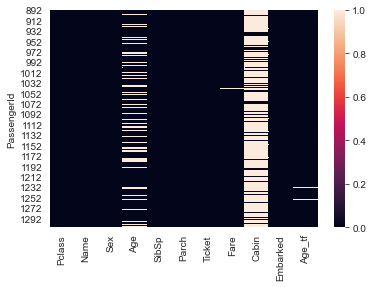

In [12]:
sns.heatmap(df.isna())

In [13]:
#df.drop(columns = ['Cabin'],inplace=True)

filt1 =df.Cabin.isna()==False
df_cabin = df.loc[filt1,:]

#sns.barplot('Cabin','Fare',data=df_cabin,orient='v')
df_cabin["Cabin_tf"] = df_cabin.Cabin.str.get(0)

<ipython-input-13-f814db736bd0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cabin["Cabin_tf"] = df_cabin.Cabin.str.get(0)


In [14]:
df_cabin.Cabin_tf.value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin_tf, dtype: int64

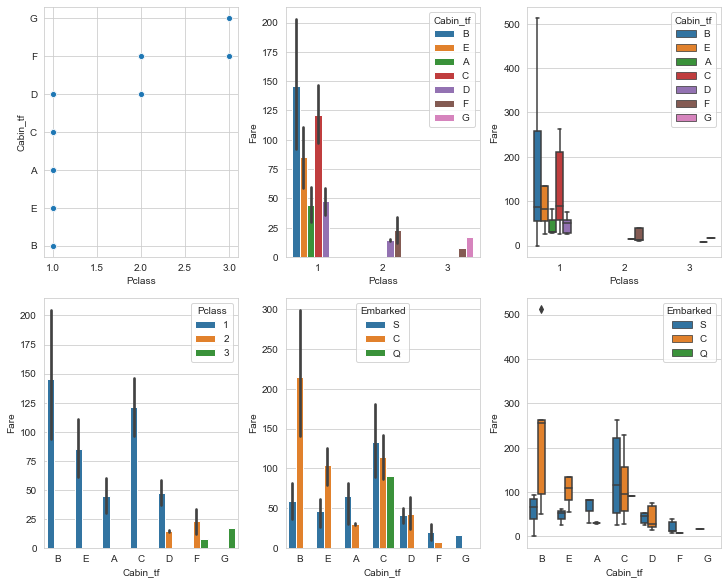

In [15]:

fig,ax  = plt.subplots(nrows=2,ncols=3,constrained_layout=True,figsize=(10,8))
sns.scatterplot("Pclass","Cabin_tf",data=df_cabin,ax=ax[0,0])
sns.barplot("Pclass","Fare",data=df_cabin,hue="Cabin_tf",ax=ax[0,1])
sns.boxplot("Pclass","Fare",data=df_cabin,hue="Cabin_tf",ax=ax[0,2])

sns.barplot("Cabin_tf","Fare",data=df_cabin,hue="Pclass",ax=ax[1,0])
sns.barplot("Cabin_tf","Fare",data=df_cabin,hue="Embarked",ax=ax[1,1])
sns.boxplot("Cabin_tf","Fare",data=df_cabin,hue="Embarked",ax=ax[1,2])

#sns.countplot("Cabin_tf",data=df_cabin,hue="Pclass",ax=ax[1,2])

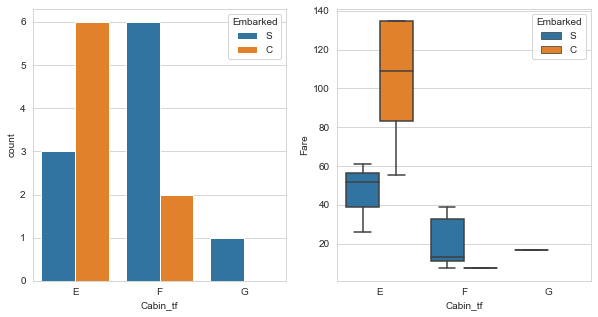

In [16]:
filt0 = (df_cabin["Cabin_tf"] == 'E') | (df_cabin["Cabin_tf"] == 'G') | (df_cabin["Cabin_tf"] == 'F')
x = df_cabin.loc[filt0,:]
fig,axs=plt.subplots(ncols=2,figsize=(10,5))
sns.countplot('Cabin_tf',hue="Embarked",data=x,ax=axs[0])
sns.boxplot('Cabin_tf','Fare',hue="Embarked",data=x,ax=axs[1])


In [17]:
df['cabin_tf'] = df['Cabin'].str.get(0)
df['cabin_tf'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
 10  Age_tf    415 non-null    float64
 11  cabin_tf  91 non-null     object 
dtypes: float64(3), int64(3), object(6)
memory usage: 48.7+ KB


In [18]:
cabin_p1 = ["A","B","C","D"]
cabin_p2 = ["D","E","F"]
cabin_p3 = ["E","F","G"]

for i in cabin_p1:
    filt2 = (df_cabin.Pclass == 1) & (df_cabin.Embarked == 'C') & (df_cabin.Cabin_tf == i) 
    #min_Fare =  df_cabin.loc[filt2,"Fare"].min()
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:1 & Embarked: C & Cabin:{i} = Fare:{describe_Fare}')
    pass
for i in cabin_p1:
    filt2 = (df_cabin.Pclass == 1) & (df_cabin.Embarked == 'S') & (df_cabin.Cabin_tf == i) 
    #min_Fare =  df_cabin.loc[filt2,"Fare"].min()
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:1 & Embarked: S & Cabin:{i} = Fare:{describe_Fare}')
    pass
for i in cabin_p1:
    filt2 = (df_cabin.Pclass == 1) & (df_cabin.Embarked == 'Q') & (df_cabin.Cabin_tf == i) 
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:1 & Embarked: Q & Cabin:{i} = Fare:{describe_Fare}')
    pass
print("-------------------------------------------------------------------------")
for i in cabin_p2:
    filt2 = (df_cabin.Pclass == 2) & (df_cabin.Embarked == 'C') & (df_cabin.Cabin_tf == i) 
    #min_Fare =  df_cabin.loc[filt2,"Fare"].min()
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:2 & Embarked: C & Cabin:{i} = Fare:{describe_Fare}')
    pass 
for i in cabin_p2:
    filt2 = (df_cabin.Pclass == 2) & (df_cabin.Embarked == 'S') & (df_cabin.Cabin_tf == i) 
    #min_Fare =  df_cabin.loc[filt2,"Fare"].min()
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:2 & Embarked: S & Cabin:{i} = Fare:{describe_Fare}')
    pass
for i in cabin_p2:
    filt2 = (df_cabin.Pclass == 2) & (df_cabin.Embarked == 'Q') & (df_cabin.Cabin_tf == i) 
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:2 & Embarked: Q & Cabin:{i} = Fare:{describe_Fare}')
    pass
print("-------------------------------------------------------------------------")
for i in cabin_p3:
    filt2 = (df_cabin.Pclass == 3) & (df_cabin.Embarked == 'C') & (df_cabin.Cabin_tf == i) 
    #min_Fare =  df_cabin.loc[filt2,"Fare"].min()
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:3 & Embarked: C & Cabin:{i} = Fare:{describe_Fare}')
    pass
for i in cabin_p3:
    filt2 = (df_cabin.Pclass == 3) & (df_cabin.Embarked == 'S') & (df_cabin.Cabin_tf == i) 
    #min_Fare =  df_cabin.loc[filt2,"Fare"].min()
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:3 & Embarked: S & Cabin:{i} = Fare:{describe_Fare}')
    pass
for i in cabin_p3:
    filt2 = (df_cabin.Pclass == 3) & (df_cabin.Embarked == 'Q') & (df_cabin.Cabin_tf == i) 
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:3 & Embarked: Q & Cabin:{i} = Fare:{describe_Fare}')
    pass



Pclass:1 & Embarked: C & Cabin:A = Fare:count     4.00000
mean     29.70000
std       1.61601
min      27.72080
25%      29.20520
50%      29.70000
75%      30.19480
max      31.67920
Name: Fare, dtype: float64
Pclass:1 & Embarked: C & Cabin:B = Fare:count     10.000000
mean     214.754580
std      138.261931
min       50.495800
25%       96.030200
50%      254.947900
75%      262.375000
max      512.329200
Name: Fare, dtype: float64
Pclass:1 & Embarked: C & Cabin:C = Fare:count     20.000000
mean     114.319380
std       67.309482
min       28.500000
25%       57.750000
50%       94.791650
75%      155.459400
max      227.525000
Name: Fare, dtype: float64
Pclass:1 & Embarked: C & Cabin:D = Fare:count     5.000000
mean     54.068320
std      24.582664
min      27.720800
25%      27.720800
50%      63.358300
75%      75.250000
max      76.291700
Name: Fare, dtype: float64
Pclass:1 & Embarked: S & Cabin:A = Fare:count     3.000000
mean     64.738867
std      29.651728
min      30.500000


In [19]:
for x in df.index:
    check = df.loc[x,"cabin_tf"]
    #print(check)
    if (df.loc[x,"cabin_tf"] is np.nan): 
        if(df.Pclass[x] == 1):
            if(df.Embarked[x] == 'C'):
                if(0 < df.Fare[x] < 145):
                    df.cabin_tf[x] = 'C'
                else:
                    df.cabin_tf[x] = 'B'
            if(df.Embarked[x] == 'S'):
                if(0 < df.Fare[x] < 101):
                    df.cabin_tf[x] = 'C'
                else:
                    df.cabin_tf[x] = 'B'
            if(df.Embarked[x] == 'Q'):
                df.cabin_tf[x] = 'C'

        if(df.Pclass[x] == 2):
            if(df.Embarked[x] == 'C'):
                if(0 < df.Fare[x] < 80):
                    df.cabin_tf[x] = 'D'
                    pass
                else:
                    df.cabin_tf[x] = 'E'
                    pass
                pass
            if(df.Embarked[x] == 'S'):
                if(0 < df.Fare[x] < 22):
                    df.cabin_tf[x] = 'F'
                    pass
                elif(22 < df.Fare[x] < 40):
                    df.cabin_tf[x] = 'E'
                    pass
                else:
                    df.cabin_tf[x] = 'D'
                    pass
                pass
            if(df.Embarked[x] == 'Q'):
                if(0 < df.Fare[x] < 10):
                    df.cabin_tf[x] = 'F'
                    pass
                else:
                    df.cabin_tf[x] = 'E'
                pass
            pass
        if(df.Pclass[x] == 3):
            if(df.Embarked[x] == 'C'):
                if(0 < df.Fare[x] < 25):
                    df.cabin_tf[x] = 'F'
                    pass
                else:
                    df.cabin_tf[x] = 'E'
                    pass
                pass
            if(df.Embarked[x] == 'S'):
                if(0 < df.Fare[x] < 15):
                    df.cabin_tf[x] = 'G'
                    pass
                elif(15 < df.Fare[x] < 25):
                    df.cabin_tf[x] = 'F'
                    pass
                else:
                    df.cabin_tf[x] = 'E'
                    pass
                pass
            if(df.Embarked[x] == 'Q'):
                if(0 < df.Fare[x] < 5):
                    df.cabin_tf[x] = 'F'
                    pass
                else:
                    df.cabin_tf[x] = 'E'
                    pass
                pass
          
           


<ipython-input-19-60095bbe4847>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cabin_tf[x] = 'E'
<ipython-input-19-60095bbe4847>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cabin_tf[x] = 'G'
<ipython-input-19-60095bbe4847>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cabin_tf[x] = 'F'
<ipython-input-19-60095bbe4847>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
 10  Age_tf    415 non-null    float64
 11  cabin_tf  418 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 48.7+ KB


In [21]:
df.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_tf,cabin_tf
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,E
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,G
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,F
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,G
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,G


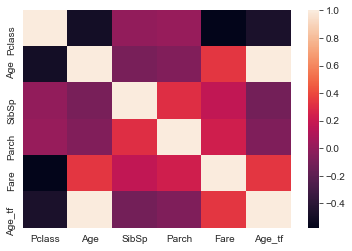

In [22]:
#sns.jointplot(x=['Age','Fare'],y='Survived',data=df)
sns.heatmap(df.corr())
#df.info()

In [23]:
df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_tf', 'cabin_tf'], dtype='object')

In [24]:
#for x in df.columns:
#    print(f'{x} : {df[x].value_counts()} \n') 

In [25]:
df.Name

PassengerId
892                                      Kelly, Mr. James
893                      Wilkes, Mrs. James (Ellen Needs)
894                             Myles, Mr. Thomas Francis
895                                      Wirz, Mr. Albert
896          Hirvonen, Mrs. Alexander (Helga E Lindqvist)
897                            Svensson, Mr. Johan Cervin
898                                  Connolly, Miss. Kate
899                          Caldwell, Mr. Albert Francis
900             Abrahim, Mrs. Joseph (Sophie Halaut Easu)
901                               Davies, Mr. John Samuel
902                                      Ilieff, Mr. Ylio
903                            Jones, Mr. Charles Cresson
904         Snyder, Mrs. John Pillsbury (Nelle Stevenson)
905                                  Howard, Mr. Benjamin
906     Chaffee, Mrs. Herbert Fuller (Carrie Constance...
907         del Carlo, Mrs. Sebastiano (Argenia Genovesi)
908                                     Keane, Mr. Daniel
90

In [26]:
 names = df['Name'].str.split(',',expand=True)
df['surname'] = names[0]
df['Names'] = names[1]
#df.drop(columns = ['Name'],inplace=True)
#df.rename(columns={'Names':'Name'},inplace=True)


Marriage_status = df['Names'].str.split('.',expand=True)
df['Marriage_status'] = Marriage_status[0]
df.head()                                             

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_tf,cabin_tf,surname,Names,Marriage_status
PassengerId,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,E,Kelly,Mr. James,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,G,Wilkes,Mrs. James (Ellen Needs),Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,F,Myles,Mr. Thomas Francis,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,G,Wirz,Mr. Albert,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,G,Hirvonen,Mrs. Alexander (Helga E Lindqvist),Mrs


In [27]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

LB = LabelEncoder()
df['Sex_tf'] = LB.fit_transform(df['Sex'])

Sex_OH =  OneHotEncoder().fit_transform(df[['Sex_tf']]).toarray()

df['gender_male'] = Sex_OH[:,1]
df['gender_female'] = Sex_OH[:,0]
df.drop(columns=['Sex_tf'],inplace=True)
df.drop(columns=['Names'],inplace=True)
df.head(1)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_tf,cabin_tf,surname,Marriage_status,gender_male,gender_female
PassengerId,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,E,Kelly,Mr,1.0,0.0


In [28]:
df['Embarked_tf']= LB.fit_transform(df.Embarked)
OH_embarked = OneHotEncoder().fit_transform(df[['Embarked_tf']]).toarray()
#lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
df['Embarked_S'] = OH_embarked[:,2]
df['Embarked_Q'] = OH_embarked[:,1]
df['Embarked_C'] = OH_embarked[:,0]
df.drop(columns=['Embarked_tf'],inplace=True)
df.head()
 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_tf,cabin_tf,surname,Marriage_status,gender_male,gender_female,Embarked_S,Embarked_Q,Embarked_C
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,E,Kelly,Mr,1.0,0.0,0.0,1.0,0.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,G,Wilkes,Mrs,0.0,1.0,1.0,0.0,0.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,F,Myles,Mr,1.0,0.0,0.0,1.0,0.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,G,Wirz,Mr,1.0,0.0,1.0,0.0,0.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,G,Hirvonen,Mrs,0.0,1.0,1.0,0.0,0.0


In [29]:
df.info()
df.Marriage_status.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           418 non-null    int64  
 1   Name             418 non-null    object 
 2   Sex              418 non-null    object 
 3   Age              332 non-null    float64
 4   SibSp            418 non-null    int64  
 5   Parch            418 non-null    int64  
 6   Ticket           418 non-null    object 
 7   Fare             417 non-null    float64
 8   Cabin            91 non-null     object 
 9   Embarked         418 non-null    object 
 10  Age_tf           415 non-null    float64
 11  cabin_tf         418 non-null    object 
 12  surname          418 non-null    object 
 13  Marriage_status  418 non-null    object 
 14  gender_male      418 non-null    float64
 15  gender_female    418 non-null    float64
 16  Embarked_S       418 non-null    float64
 17  Embarked_Q   

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Rev         2
 Col         2
 Ms          1
 Dr          1
 Dona        1
Name: Marriage_status, dtype: int64

In [30]:
#for x in df.index:
    #print(df.Marriage_status[x])
#    if (df.Marriage_status[x] != " Mr"): # or " Miss" or " Mrs" or " Master"):
#        print(df.Marriage_status[x])
        #df.Marriage_status[x] = 'others'
#    elif (df.Marriage_status[x] != " Miss"):
        #df.Marriage_status[x] = 'others'
#    elif (df.Marriage_status[x] != " Mrs"):
        #df.Marriage_status[x] = 'others'
#    elif (df.Marriage_status[x] != " Master"):
        #df.Marriage_status[x] = 'others'
#    pass

df = pd.get_dummies(df, columns=['Marriage_status'], prefix = ['Name_prefix'])





    
#print(df.Marriage_status[x])
#df.Marriage_status.value_counts()


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               418 non-null    int64  
 1   Name                 418 non-null    object 
 2   Sex                  418 non-null    object 
 3   Age                  332 non-null    float64
 4   SibSp                418 non-null    int64  
 5   Parch                418 non-null    int64  
 6   Ticket               418 non-null    object 
 7   Fare                 417 non-null    float64
 8   Cabin                91 non-null     object 
 9   Embarked             418 non-null    object 
 10  Age_tf               415 non-null    float64
 11  cabin_tf             418 non-null    object 
 12  surname              418 non-null    object 
 13  gender_male          418 non-null    float64
 14  gender_female        418 non-null    float64
 15  Embarked_S           418 non-null    

In [32]:
#df.surname.value_counts()
#df = pd.get_dummies(df, columns=['surname'], prefix = ['surname'])
df.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_tf,cabin_tf,surname,gender_male,gender_female,Embarked_S,Embarked_Q,Embarked_C,Name_prefix_ Col,Name_prefix_ Dona,Name_prefix_ Dr,Name_prefix_ Master,Name_prefix_ Miss,Name_prefix_ Mr,Name_prefix_ Mrs,Name_prefix_ Ms,Name_prefix_ Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,E,Kelly,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,0,0,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,G,Wilkes,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,1,0,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,F,Myles,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,0,0,0


In [33]:
#codes, uniques= pd.factorize(df['surname'])

#df.head(3)

In [34]:
#sns.countplot('Embarked_tf' ,data=df_final, hue='Survived',orient='v')

In [35]:

df = pd.get_dummies(df, columns=['cabin_tf'], prefix = ['cabin_'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               418 non-null    int64  
 1   Name                 418 non-null    object 
 2   Sex                  418 non-null    object 
 3   Age                  332 non-null    float64
 4   SibSp                418 non-null    int64  
 5   Parch                418 non-null    int64  
 6   Ticket               418 non-null    object 
 7   Fare                 417 non-null    float64
 8   Cabin                91 non-null     object 
 9   Embarked             418 non-null    object 
 10  Age_tf               415 non-null    float64
 11  surname              418 non-null    object 
 12  gender_male          418 non-null    float64
 13  gender_female        418 non-null    float64
 14  Embarked_S           418 non-null    float64
 15  Embarked_Q           418 non-null    

In [37]:
df_final = df

df.drop(columns=['Name','Sex','Age','Ticket','Cabin','Embarked','surname'],inplace=True)
df_final.head(2)

,Pclass,SibSp,Parch,Fare,Age_tf,gender_male,gender_female,Embarked_S,Embarked_Q,Embarked_C,Name_prefix_ Col,Name_prefix_ Dona,Name_prefix_ Dr,Name_prefix_ Master,Name_prefix_ Miss,Name_prefix_ Mr,Name_prefix_ Mrs,Name_prefix_ Ms,Name_prefix_ Rev,cabin__A,cabin__B,cabin__C,cabin__D,cabin__E,cabin__F,cabin__G
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,
892,3,0,0,7.8292,34.5,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
893,3,1,0,7.0000,47.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


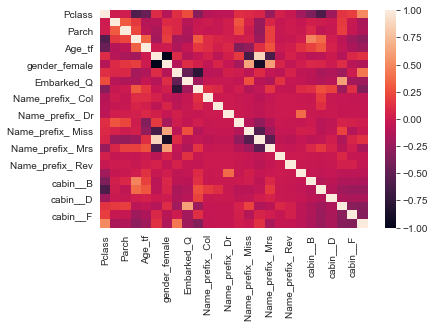

In [38]:
sns.heatmap(df_final.corr())

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               418 non-null    int64  
 1   SibSp                418 non-null    int64  
 2   Parch                418 non-null    int64  
 3   Fare                 417 non-null    float64
 4   Age_tf               415 non-null    float64
 5   gender_male          418 non-null    float64
 6   gender_female        418 non-null    float64
 7   Embarked_S           418 non-null    float64
 8   Embarked_Q           418 non-null    float64
 9   Embarked_C           418 non-null    float64
 10  Name_prefix_ Col     418 non-null    uint8  
 11  Name_prefix_ Dona    418 non-null    uint8  
 12  Name_prefix_ Dr      418 non-null    uint8  
 13  Name_prefix_ Master  418 non-null    uint8  
 14  Name_prefix_ Miss    418 non-null    uint8  
 15  Name_prefix_ Mr      418 non-null    

In [40]:

filtfare = df.Fare.isna() == True
df.loc[filtfare,"Fare"]

PassengerId
1044   NaN
Name: Fare, dtype: float64

In [41]:
df.loc[1044,:]

Pclass                  3.0
SibSp                   0.0
Parch                   0.0
Fare                    NaN
Age_tf                 60.5
gender_male             1.0
gender_female           0.0
Embarked_S              1.0
Embarked_Q              0.0
Embarked_C              0.0
Name_prefix_ Col        0.0
Name_prefix_ Dona       0.0
Name_prefix_ Dr         0.0
Name_prefix_ Master     0.0
Name_prefix_ Miss       0.0
Name_prefix_ Mr         1.0
Name_prefix_ Mrs        0.0
Name_prefix_ Ms         0.0
Name_prefix_ Rev        0.0
cabin__A                0.0
cabin__B                0.0
cabin__C                0.0
cabin__D                0.0
cabin__E                1.0
cabin__F                0.0
cabin__G                0.0
Name: 1044, dtype: float64

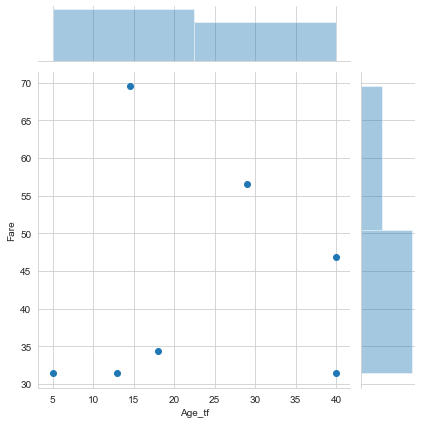

In [42]:
#filt_final = (df["Pclass"]==3) & (df["Embarked_S"] ==1.0)& (df["gender_male"] ==1.0) & (df["SibSp"] ==0) & (df["Parch"] ==0)& (df["Name_prefix_ Mr"] ==1.0)&(df["cabin__E"] ==1.0)
filt_final = (df["gender_male"] ==1.0) & (df["Pclass"]==3) & (df["Embarked_S"] ==1.0) &(df["cabin__E"] ==1.0) #& (df["SibSp"] ==0) & (df["Parch"] ==0)
 
a = df.loc[filt_final,["Fare","Age_tf"]]
sns.jointplot('Age_tf',"Fare",data=a)

In [43]:
df.Fare.fillna(39,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               418 non-null    int64  
 1   SibSp                418 non-null    int64  
 2   Parch                418 non-null    int64  
 3   Fare                 418 non-null    float64
 4   Age_tf               415 non-null    float64
 5   gender_male          418 non-null    float64
 6   gender_female        418 non-null    float64
 7   Embarked_S           418 non-null    float64
 8   Embarked_Q           418 non-null    float64
 9   Embarked_C           418 non-null    float64
 10  Name_prefix_ Col     418 non-null    uint8  
 11  Name_prefix_ Dona    418 non-null    uint8  
 12  Name_prefix_ Dr      418 non-null    uint8  
 13  Name_prefix_ Master  418 non-null    uint8  
 14  Name_prefix_ Miss    418 non-null    uint8  
 15  Name_prefix_ Mr      418 non-null    

In [46]:
filt_age = df.Age_tf.isna()==True
df.loc[filt_age,"Age_tf"]

PassengerId
1024   NaN
1234   NaN
1257   NaN
Name: Age_tf, dtype: float64

In [58]:
df.loc[1257,:]

Pclass                  3.00
SibSp                   1.00
Parch                   9.00
Fare                   69.55
Age_tf                   NaN
gender_male             0.00
gender_female           1.00
Embarked_S              1.00
Embarked_Q              0.00
Embarked_C              0.00
Name_prefix_ Col        0.00
Name_prefix_ Dona       0.00
Name_prefix_ Dr         0.00
Name_prefix_ Master     0.00
Name_prefix_ Miss       0.00
Name_prefix_ Mr         0.00
Name_prefix_ Mrs        1.00
Name_prefix_ Ms         0.00
Name_prefix_ Rev        0.00
cabin__A                0.00
cabin__B                0.00
cabin__C                0.00
cabin__D                0.00
cabin__E                1.00
cabin__F                0.00
cabin__G                0.00
Name: 1257, dtype: float64

In [60]:
par = df.Parch == 4
par = df.loc[par,['Pclass','Age_tf','gender_female','cabin__E','SibSp','Embarked_S']]
par

,Pclass,Age_tf,gender_female,cabin__E,SibSp,Embarked_S
PassengerId,,,,,,
961,1,60.0,1.0,0,1,1.0
1024,3,NaN,1.0,1,0,1.0


In [61]:
df.Age_tf.fillna(70,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               418 non-null    int64  
 1   SibSp                418 non-null    int64  
 2   Parch                418 non-null    int64  
 3   Fare                 418 non-null    float64
 4   Age_tf               418 non-null    float64
 5   gender_male          418 non-null    float64
 6   gender_female        418 non-null    float64
 7   Embarked_S           418 non-null    float64
 8   Embarked_Q           418 non-null    float64
 9   Embarked_C           418 non-null    float64
 10  Name_prefix_ Col     418 non-null    uint8  
 11  Name_prefix_ Dona    418 non-null    uint8  
 12  Name_prefix_ Dr      418 non-null    uint8  
 13  Name_prefix_ Master  418 non-null    uint8  
 14  Name_prefix_ Miss    418 non-null    uint8  
 15  Name_prefix_ Mr      418 non-null    

In [62]:
df.to_csv("project_test_tf_2.csv")